<a href="https://colab.research.google.com/github/ShangZheTsai/NYUST-ML-final/blob/main/PCA(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
heart =pd.read_csv('/content/drive/MyDrive/final project/heart.csv')

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set') 

In [ ]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
from sklearn.model_selection import train_test_split

X, y = heart.iloc[:, :-1].values, heart.iloc[:, -1].values

print(heart['output'].value_counts())

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=1)

1    165
0    138
Name: output, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

###PCA from scratch

In [ ]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[2.72805619 1.58695788 0.41419423 0.39154852 1.26544378 1.15015518
 1.08116126 0.96701347 0.86533344 0.53832604 0.61328686 0.76419268
 0.6918526 ]


In [ ]:
tot = np.sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [ ]:
print(np.array(var_exp))

[0.20892602 0.12153591 0.09691301 0.08808372 0.08279988 0.07405796
 0.06627088 0.05852509 0.05298498 0.04696809 0.04122727 0.03172074
 0.02998643]


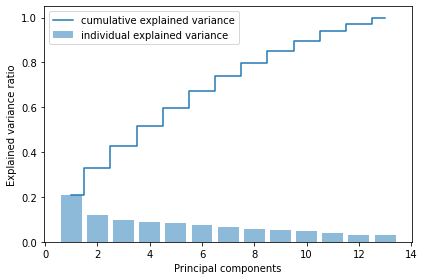

In [ ]:
import matplotlib.pyplot as plt


plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# Note: I added the `key=lambda k: k[0]` in the sort call above
# just like I used it further below in the LDA section.
# This is to avoid problems if there are ties in the eigenvalue
# arrays (i.e., the sorting algorithm will only regard the
# first element of the tuples, now).

In [ ]:

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.30479952 -0.39018634]
 [-0.11948708  0.25595984]
 [ 0.26757129 -0.3514689 ]
 [-0.15624379 -0.47241032]
 [-0.13102052 -0.31443743]
 [-0.05473307 -0.42270733]
 [ 0.11626071  0.22490254]
 [ 0.42413958 -0.03964519]
 [-0.40320238  0.18030713]
 [-0.41069247  0.08866984]
 [ 0.38478024 -0.1109913 ]
 [-0.24910409 -0.16907259]
 [-0.20467391  0.15669843]]


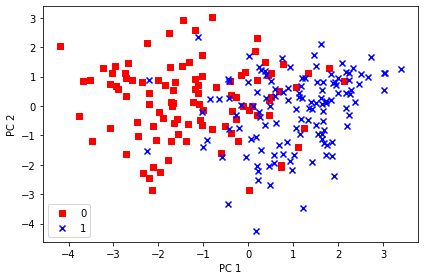

In [ ]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

###PCA using sklearn

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pca.explained_variance_ratio_

array([0.20892602, 0.12153591])

In [ ]:
sum = 0
for x in range(0,227):
  temp = X_train_pca[x,0] * X_train_pca[x,1]
  sum += temp
print(sum)

8.676392937445598e-14


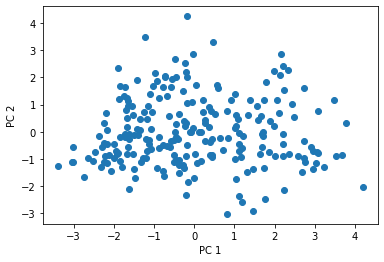

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [ ]:
print(pca.components_.shape)
print(pca.components_)

(2, 13)
[[ 0.30479952  0.11948708 -0.26757129  0.15624379  0.13102052  0.05473307
  -0.11626071 -0.42413958  0.40320238  0.41069247 -0.38478024  0.24910409
   0.20467391]
 [ 0.39018634 -0.25595984  0.3514689   0.47241032  0.31443743  0.42270733
  -0.22490254  0.03964519 -0.18030713 -0.08866984  0.1109913   0.16907259
  -0.15669843]]


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

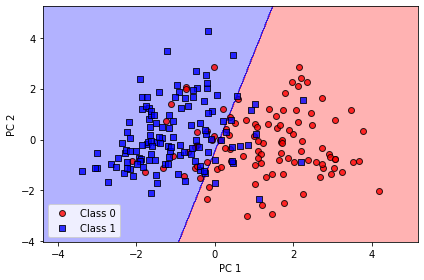

In [ ]:
plot_decision_regions(X_train_pca, y_train, classifier=lr) #train資料
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()

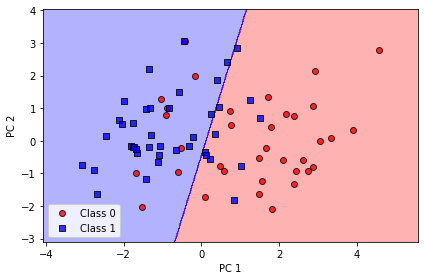

In [ ]:
plot_decision_regions(X_test_pca, y_test, classifier=lr) #test資料
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca4.png', dpi=300)
plt.show() 


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = lr.predict(X_test_pca)
print('Accuracy: %f'% accuracy_score(y_true, y_pred))

print('Misclassified examples: %d' % (y_test != y_pred).sum())
confusion_matrix(y_test, y_pred)

Accuracy: 0.750000
Misclassified examples: 19


array([[26,  9],
       [10, 31]])

###Change the number of eigenvecots

In [ ]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
y_true = y_test
y_pred = lr.predict(X_test_pca)
print('Accuracy: %f'% accuracy_score(y_true, y_pred))

print('Misclassified examples: %d' % (y_test != y_pred).sum())
confusion_matrix(y_test, y_pred)

Accuracy: 0.723684
Misclassified examples: 21


array([[25, 10],
       [11, 30]])

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
y_true = y_test
y_pred = lr.predict(X_test_pca)
print('Accuracy: %f'% accuracy_score(y_true, y_pred))

print('Misclassified examples: %d' % (y_test != y_pred).sum())
confusion_matrix(y_test, y_pred)

Accuracy: 0.750000
Misclassified examples: 19


array([[26,  9],
       [10, 31]])

In [ ]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
y_true = y_test
y_pred = lr.predict(X_test_pca)
print('Accuracy: %f'% accuracy_score(y_true, y_pred))

print('Misclassified examples: %d' % (y_test != y_pred).sum())
confusion_matrix(y_test, y_pred)

Accuracy: 0.802632
Misclassified examples: 15


array([[25, 10],
       [ 5, 36]])

In [ ]:
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
y_true = y_test
y_pred = lr.predict(X_test_pca)
print('Accuracy: %f'% accuracy_score(y_true, y_pred))

print('Misclassified examples: %d' % (y_test != y_pred).sum())
confusion_matrix(y_test, y_pred)

Accuracy: 0.802632
Misclassified examples: 15


array([[25, 10],
       [ 5, 36]])

In [ ]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
y_true = y_test
y_pred = lr.predict(X_test_pca)
print('Accuracy: %f'% accuracy_score(y_true, y_pred))

print('Misclassified examples: %d' % (y_test != y_pred).sum())
confusion_matrix(y_test, y_pred)

Accuracy: 0.802632
Misclassified examples: 15


array([[25, 10],
       [ 5, 36]])

In [ ]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
y_true = y_test
y_pred = lr.predict(X_test_pca)
print('Accuracy: %f'% accuracy_score(y_true, y_pred))

print('Misclassified examples: %d' % (y_test != y_pred).sum())
confusion_matrix(y_test, y_pred)

Accuracy: 0.802632
Misclassified examples: 15


array([[25, 10],
       [ 5, 36]])

In [ ]:
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
y_true = y_test
y_pred = lr.predict(X_test_pca)
print('Accuracy: %f'% accuracy_score(y_true, y_pred))

print('Misclassified examples: %d' % (y_test != y_pred).sum())
confusion_matrix(y_test, y_pred)

Accuracy: 0.802632
Misclassified examples: 15


array([[25, 10],
       [ 5, 36]])

In [ ]:
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
y_true = y_test
y_pred = lr.predict(X_test_pca)
print('Accuracy: %f'% accuracy_score(y_true, y_pred))

print('Misclassified examples: %d' % (y_test != y_pred).sum())
confusion_matrix(y_test, y_pred)

Accuracy: 0.802632
Misclassified examples: 15


array([[25, 10],
       [ 5, 36]])

In [ ]:
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
y_true = y_test
y_pred = lr.predict(X_test_pca)
print('Accuracy: %f'% accuracy_score(y_true, y_pred))

print('Misclassified examples: %d' % (y_test != y_pred).sum())
confusion_matrix(y_test, y_pred)

Accuracy: 0.763158
Misclassified examples: 18


array([[24, 11],
       [ 7, 34]])

In [ ]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
y_true = y_test
y_pred = lr.predict(X_test_pca)
print('Accuracy: %f'% accuracy_score(y_true, y_pred))

print('Misclassified examples: %d' % (y_test != y_pred).sum())
confusion_matrix(y_test, y_pred)

Accuracy: 0.763158
Misclassified examples: 18


array([[24, 11],
       [ 7, 34]])

In [ ]:
pca = PCA(n_components=11)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
y_true = y_test
y_pred = lr.predict(X_test_pca)
print('Accuracy: %f'% accuracy_score(y_true, y_pred))

print('Misclassified examples: %d' % (y_test != y_pred).sum())
confusion_matrix(y_test, y_pred)

Accuracy: 0.763158
Misclassified examples: 18


array([[24, 11],
       [ 7, 34]])

In [ ]:
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
y_true = y_test
y_pred = lr.predict(X_test_pca)
print('Accuracy: %f'% accuracy_score(y_true, y_pred))

print('Misclassified examples: %d' % (y_test != y_pred).sum())
confusion_matrix(y_test, y_pred)

Accuracy: 0.763158
Misclassified examples: 18


array([[24, 11],
       [ 7, 34]])

In [ ]:
pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
y_true = y_test
y_pred = lr.predict(X_test_pca)
print('Accuracy: %f'% accuracy_score(y_true, y_pred))

print('Misclassified examples: %d' % (y_test != y_pred).sum())
confusion_matrix(y_test, y_pred)

Accuracy: 0.750000
Misclassified examples: 19


array([[24, 11],
       [ 8, 33]])